In [6]:
import pandas as pd

# Load CSV file
Dataset_Train = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Train_Final.csv')
Dataset_Test = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Test_Final.csv')

In [7]:
# Convert the specified columns to categorical
Dataset_Train['stress_level'] = Dataset_Train['stress_level'].astype('category')

# Verify the changes
print(Dataset_Train[['stress_level']].dtypes)
# Convert the specified columns to categorical
Dataset_Test['stress_level'] = Dataset_Test['stress_level'].astype('category')

# Verify the changes
print(Dataset_Test[['stress_level']].dtypes)

stress_level    category
dtype: object
stress_level    category
dtype: object


In [12]:
Dataset_Train['activity_group'] = (
    Dataset_Train['activity_group']
    .apply(lambda x: ','.join(sorted([i.strip() for i in x.split(',')])))
)
Dataset_Test['activity_group'] = (
    Dataset_Test['activity_group']
    .apply(lambda x: ','.join(sorted([i.strip() for i in x.split(',')])))
)

In [13]:
Dataset_Train['activity_group'].nunique()

20

In [14]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


['age', 'height_cm', 'weight_kg', 'duration_minutes', 'calories_burned', 'daily_steps', 'avg_heart_rate', 'resting_heart_rate', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'endurance_level', 'fitness_level', 'sleep_hours', 'hydration_level', 'bmi']


C:\Users\Ashani Madushani\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:18:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Train Accuracy: 0.8575
✅ Test Accuracy: 0.705

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

      Asthma       0.00      0.00      0.00        29
    Diabetes       0.00      0.00      0.00        57
Hypertension       0.00      0.00      0.00        87
     healthy       0.71      0.99      0.83       427

    accuracy                           0.70       600
   macro avg       0.18      0.25      0.21       600
weighted avg       0.51      0.70      0.59       600



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


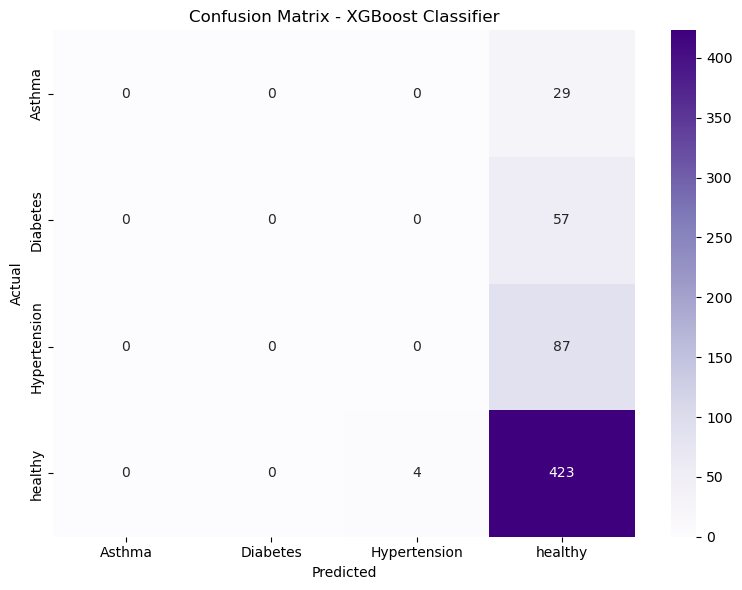

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================
# 1. Prepare features and target
# ================================================
X_train = Dataset_Train.drop(columns=['health_condition'])
y_train = Dataset_Train['health_condition']
X_test = Dataset_Test.drop(columns=['health_condition'])
y_test = Dataset_Test['health_condition']

# ================================================
# 2. Identify numeric and categorical columns
# ================================================
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(numeric_cols)
# ================================================
# 3. Preprocessing pipeline
# ================================================
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# ================================================
# 4. Transform data
# ================================================
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ================================================
# 5. Encode target variable
# ================================================
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ================================================
# 6. Train XGBoost Classifier
# ================================================
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train_processed, y_train_encoded)

# ================================================
# 7. Predictions
# ================================================
y_train_pred = le.inverse_transform(xgb_model.predict(X_train_processed))
y_test_pred = le.inverse_transform(xgb_model.predict(X_test_processed))

# ================================================
# 8. Evaluation
# ================================================
print("✅ Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("✅ Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# ================================================
# 9. Confusion Matrix
# ================================================
cm = confusion_matrix(y_test, y_test_pred, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import recall_score, f1_score

# ================================================
# 🔍 Additional Evaluation Metrics
# ================================================

# Sensitivity (Recall)
train_sensitivity = recall_score(y_train, y_train_pred, average='weighted')
test_sensitivity = recall_score(y_test, y_test_pred, average='weighted')

# F1 Score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("🔹 Additional Performance Metrics 🔹")
print(f"✅ Train Sensitivity (Recall): {train_sensitivity:.4f}")
print(f"✅ Test Sensitivity (Recall):  {test_sensitivity:.4f}")
print(f"✅ Train F1 Score:             {train_f1:.4f}")
print(f"✅ Test F1 Score:              {test_f1:.4f}")


🔹 Additional Performance Metrics 🔹
✅ Train Sensitivity (Recall): 0.8575
✅ Test Sensitivity (Recall):  0.7050
✅ Train F1 Score:             0.8404
✅ Test F1 Score:              0.5885


## With SMOTE

✅ Before SMOTE: {3: 1711, 2: 347, 1: 226, 0: 116}
✅ After SMOTE: {3: 1711, 2: 1711, 1: 1711, 0: 1711}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Ashani Madushani\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:53:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Train Accuracy: 0.9517825832846288
✅ Test Accuracy: 0.7066666666666667

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

      Asthma       0.00      0.00      0.00        29
    Diabetes       0.00      0.00      0.00        57
Hypertension       0.00      0.00      0.00        87
     healthy       0.71      0.99      0.83       427

    accuracy                           0.71       600
   macro avg       0.18      0.25      0.21       600
weighted avg       0.51      0.71      0.59       600



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


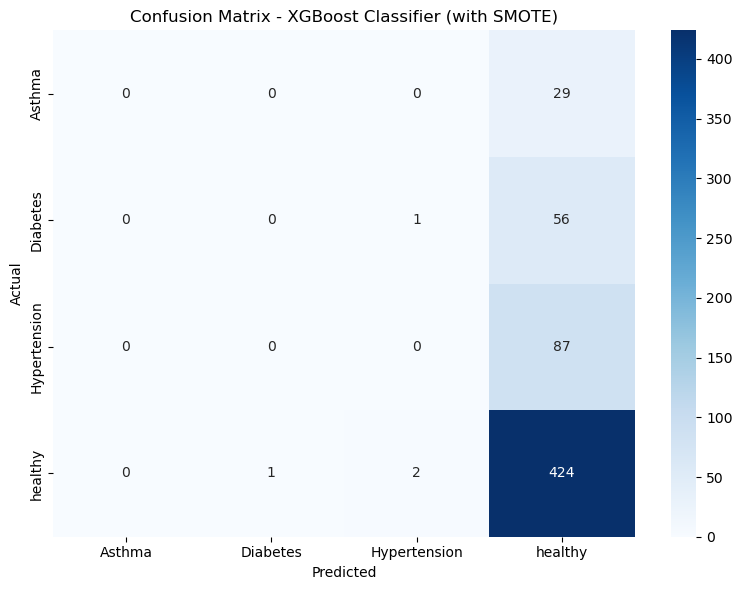

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1️⃣ Prepare Features and Target
# ==========================================
X_train = Dataset_Train.drop(columns=['health_condition'])
y_train = Dataset_Train['health_condition']
X_test = Dataset_Test.drop(columns=['health_condition'])
y_test = Dataset_Test['health_condition']

# ==========================================
# 2️⃣ Identify column types
# ==========================================
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# ==========================================
# 3️⃣ Preprocessing (Scaling + OneHotEncoding)
# ==========================================
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# Fit & transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ==========================================
# 4️⃣ Encode target variable
# ==========================================
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ==========================================
# 5️⃣ Apply SMOTE (only on training data)
# ==========================================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train_encoded)

print("✅ Before SMOTE:", dict(pd.Series(y_train_encoded).value_counts()))
print("✅ After SMOTE:", dict(pd.Series(y_train_resampled).value_counts()))

# ==========================================
# 6️⃣ Train XGBoost Classifier
# ==========================================
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    learning_rate=0.1,
    n_estimators=200,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train_resampled, y_train_resampled)

# ==========================================
# 7️⃣ Predictions
# ==========================================
y_train_pred = le.inverse_transform(xgb_model.predict(X_train_resampled))
y_test_pred = le.inverse_transform(xgb_model.predict(X_test_processed))

# ==========================================
# 8️⃣ Evaluation
# ==========================================
print("✅ Train Accuracy:", accuracy_score(le.inverse_transform(y_train_resampled), y_train_pred))
print("✅ Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# ==========================================
# 9️⃣ Confusion Matrix (Test Set)
# ==========================================
cm = confusion_matrix(y_test, y_test_pred, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost Classifier (with SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
